In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed

seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor 

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
df=pd.read_excel('data.xlsx')
df.head()

,Date,Temp,Dew Point,Humidity,Wind Speed,Pressure,Wind Direction,Pressure Grad,Wind Gradient
0,2020-01-01,5.7,4.8,94.4,2.47,1029.0,128,-8,3
1,2020-01-02,9.3,8.2,92.5,7.42,1021.4,188,0,8
2,2020-01-03,8.2,6.8,91.4,6.81,1021.8,265,11,7
3,2020-01-04,5.6,3.6,87.2,3.94,1033.7,248,-1,2
4,2020-01-05,7.8,6.1,89.2,3.33,1033.4,224,-11,5


In [3]:
df['Year']  = df['Date'].apply(lambda x: int(str(x)[:4]))
df['Month'] = df['Date'].apply(lambda x: int(str(x)[5:7]))
df['Day']=df['Date'].apply(lambda x: int(str(x)[8:10]))
df.head()

,Date,Temp,Dew Point,Humidity,Wind Speed,Pressure,Wind Direction,Pressure Grad,Wind Gradient,Year,Month,Day
0,2020-01-01,5.7,4.8,94.4,2.47,1029.0,128,-8,3,2020,1,1
1,2020-01-02,9.3,8.2,92.5,7.42,1021.4,188,0,8,2020,1,2
2,2020-01-03,8.2,6.8,91.4,6.81,1021.8,265,11,7,2020,1,3
3,2020-01-04,5.6,3.6,87.2,3.94,1033.7,248,-1,2,2020,1,4
4,2020-01-05,7.8,6.1,89.2,3.33,1033.4,224,-11,5,2020,1,5


In [4]:
del df['Date']
#del df['Year']
#del df['Month']
df.head()

,Temp,Dew Point,Humidity,Wind Speed,Pressure,Wind Direction,Pressure Grad,Wind Gradient,Year,Month,Day
0,5.7,4.8,94.4,2.47,1029.0,128,-8,3,2020,1,1
1,9.3,8.2,92.5,7.42,1021.4,188,0,8,2020,1,2
2,8.2,6.8,91.4,6.81,1021.8,265,11,7,2020,1,3
3,5.6,3.6,87.2,3.94,1033.7,248,-1,2,2020,1,4
4,7.8,6.1,89.2,3.33,1033.4,224,-11,5,2020,1,5


In [5]:
X = df.drop(['Wind Speed'], axis=1)
#Assign the Target column as the output 
Y= df['Wind Speed']

In [6]:
X_norm=(X-X.min())/(X.max()-X.min())
X_norm

,Temp,Dew Point,Humidity,Pressure,Wind Direction,Pressure Grad,Wind Gradient,Year,Month,Day
0,0.299639,0.487805,0.923913,0.752055,0.342679,0.449275,0.200000,1.0,0.0,0.000000
1,0.429603,0.606272,0.898098,0.647945,0.529595,0.565217,0.533333,1.0,0.0,0.033333
2,0.389892,0.557491,0.883152,0.653425,0.769470,0.724638,0.466667,1.0,0.0,0.066667
3,0.296029,0.445993,0.826087,0.816438,0.716511,0.550725,0.133333,1.0,0.0,0.100000
4,0.375451,0.533101,0.853261,0.812329,0.641745,0.405797,0.333333,1.0,0.0,0.133333
...,...,...,...,...,...,...,...,...,...,...
1091,0.198556,0.411150,0.972826,0.706849,0.676012,0.623188,0.066667,0.0,1.0,0.866667
1092,0.259928,0.470383,0.966033,0.767123,0.757009,0.594203,0.200000,0.0,1.0,0.900000
1093,0.415162,0.595819,0.915761,0.795890,0.738318,0.594203,0.266667,0.0,1.0,0.933333
1094,0.346570,0.564460,0.998641,0.831507,0.753894,0.565217,0.200000,0.0,1.0,0.966667


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.3, random_state=0)

In [9]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation="sigmoid", kernel_initializer='normal'))
model.add(Dropout(0.2)) #dropping a few neurons for generalizing the model
model.add(Dense(16, input_dim=x_train.shape[1], activation="sigmoid", kernel_initializer='normal'))
model.add(Dropout(0.2)) 
model.add(Dense(1, activation="linear", kernel_initializer='normal'))
adam = Adam(learning_rate=1e-3, decay=1e-3)

# Compile model
model.compile(loss="mean_squared_error", optimizer='adam', metrics=['mse','mae'])

In [10]:
print('Fit model...')
filepath="/home/m-marouni/Documents/CE-901/Heathrow/best_weights"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_mae', patience=100, verbose=1, mode='min')
callbacks_list = [checkpoint, early_stopping]

log = model.fit(x_train, y_train,
          validation_split=0.40, batch_size=30, epochs=1000, shuffle=True, callbacks=callbacks_list)

Fit model...
Epoch 1/1000
16/16 [==============================] - 11s 33ms/step - loss: 43.5478 - mse: 43.5478 - mae: 6.0556 - val_loss: 37.8508 - val_mse: 37.8508 - val_mae: 5.6528

Epoch 00001: val_mae improved from inf to 5.65285, saving model to /home/m-marouni/Documents/CE-901/Heathrow/best_weights
INFO:tensorflow:Assets written to: /home/m-marouni/Documents/CE-901/Heathrow/best_weights/assets
Epoch 2/1000
16/16 [==============================] - 0s 5ms/step - loss: 43.1371 - mse: 43.1371 - mae: 6.0465 - val_loss: 36.0644 - val_mse: 36.0644 - val_mae: 5.4926

Epoch 00002: val_mae improved from 5.65285 to 5.49257, saving model to /home/m-marouni/Documents/CE-901/Heathrow/best_weights
INFO:tensorflow:Assets written to: /home/m-marouni/Documents/CE-901/Heathrow/best_weights/assets
Epoch 3/1000
16/16 [==============================] - 0s 5ms/step - loss: 40.9557 - mse: 40.9557 - mae: 5.8814 - val_loss: 34.2838 - val_mse: 34.2838 - val_mae: 5.3280

Epoch 00003: val_mae improved from 5

In [11]:
def show_info(model, X, y, log, weights = None):
    '''
    Show metrics about the evaluation model and plots about loss, rmse and rmspe
    '''
    if (log != None):
        # summarize history for loss
        plt.figure(figsize=(14,10))
        plt.plot(log.history['loss'])
        plt.plot(log.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')

        # summarize history for MAE
        plt.figure(figsize=(14,10))
        plt.plot(log.history['mae'])
        plt.plot(log.history['val_mae'])
        plt.title('Model MAE')
        plt.ylabel('MAE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')

        # summarize history for MSE
        plt.figure(figsize=(14,10))
        plt.plot(log.history['mse'])
        plt.plot(log.history['val_mse'])
        plt.title('Model MSE')
        plt.ylabel('MSE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')
    if (weights != None):
        model.load_weights(weights)

    predictions = model.predict(X, verbose=1)

    mse = mean_squared_error(y, predictions)
    mae= mean_absolute_error(y, predictions)

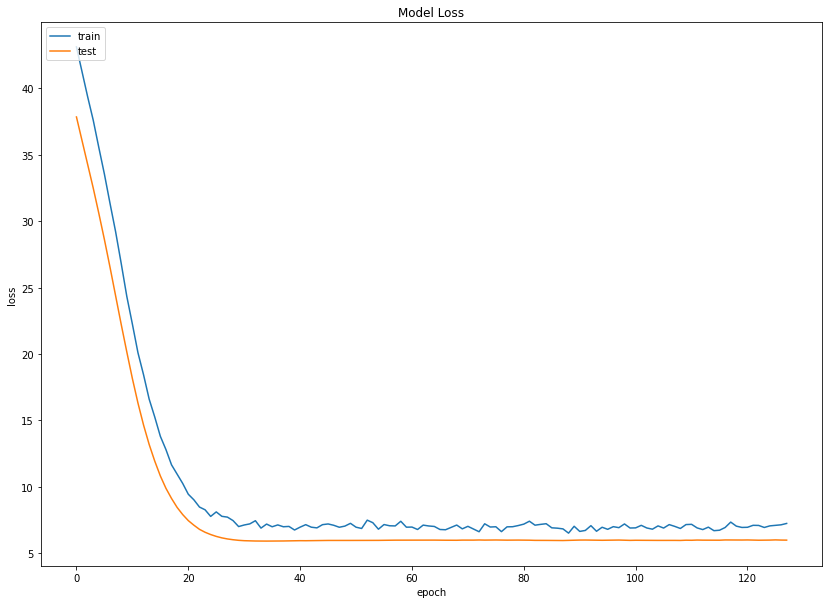

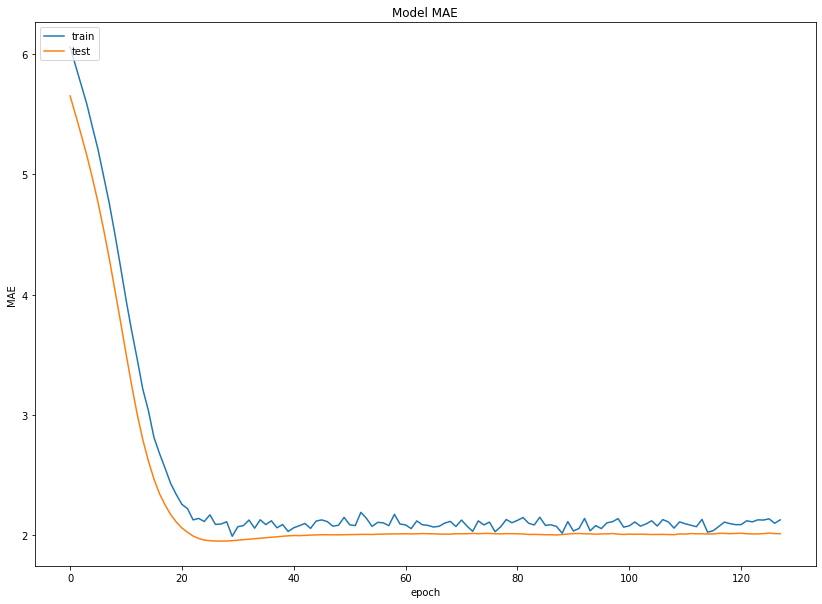

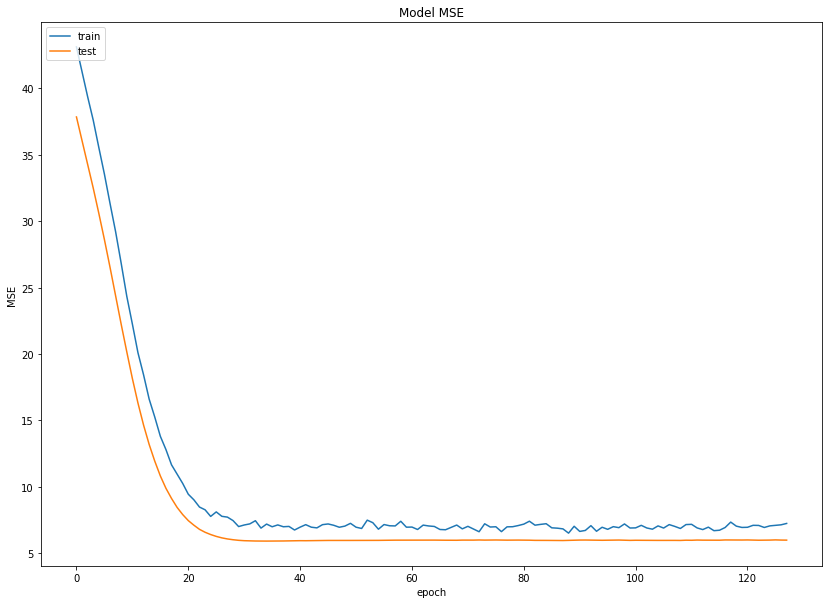



11/11 [==============================] - 1s 1ms/step


In [12]:
show_info(model, x_test, y_test, log, weights='/home/m-marouni/Documents/CE-901/Heathrow/best_weights')